In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

In [2]:
df = pd.read_csv('data/Battery_RUL.csv')

print(df.shape)
df

(15064, 9)


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [3]:
#adding battery index to the concatenated dataset
battery_idx = list(df[df['Cycle_Index'].diff()< 0]['Cycle_Index'].index)
battery_idx.append(0)
battery_idx.append(len(df))
battery_idx.sort()


for i,j in zip(range(0,len(battery_idx)),range(1,len(battery_idx))):

 
    
    df.loc[battery_idx[i]:battery_idx[j], 'Battery Index' ]= i
    

df = df.drop(columns=['Cycle_Index'])
display(df)
print('There are 14 batteries in this dataset')

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Battery Index
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,0.0
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,0.0
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,0.0
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,0.0
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,0.0
...,...,...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,13.0
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,13.0
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,13.0
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1,13.0


There are 14 batteries in this dataset


In [45]:
#use the first 11 batteries for training and the rest for testing
df =df[['Battery Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL']]

train_df = df[df['Battery Index']<=9]
val_df = df[(df['Battery Index']>9)&(df['Battery Index']<=11)]
test_df = df[df['Battery Index']>11]

display(train_df)
display(val_df)
display(test_df)


,Battery Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,0.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,0.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,0.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,0.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,0.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
10782,9.0,876.00,234.166667,3.800,3.711,1160.250,1736.25,7280.25,4
10783,9.0,876.00,234.750000,3.800,3.711,1156.375,1700.38,7352.38,3
10784,9.0,876.00,233.470588,3.800,3.711,1155.812,1700.31,7298.06,2
10785,9.0,885.56,229.781250,3.793,3.966,780.500,1463.00,8337.00,1


,Battery Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
10787,10.0,2576.00,1197.024000,3.663,3.223,5418.016000,6712.99,10815.74,1107
10788,10.0,7371.01,1232.000000,4.239,3.234,5460.000000,6712.99,10500.00,1106
10789,10.0,7343.01,1148.000000,4.241,3.240,5439.008000,6692.00,10402.02,1105
10790,10.0,7343.01,1123.504000,4.243,3.241,5446.016000,6699.01,10363.48,1104
10791,10.0,64889.99,1130.511000,4.287,3.247,5439.008000,107552.49,107552.49,1102
...,...,...,...,...,...,...,...,...,...
12936,11.0,1000.62,254.117647,3.783,3.695,1358.375000,2024.38,7607.62,4
12937,11.0,998.06,254.117647,3.783,3.695,1360.884429,2024.31,7586.50,3
12938,11.0,998.38,253.323529,3.783,3.696,1355.803571,1988.38,7594.12,2
12939,11.0,1000.38,247.219000,3.779,3.960,1022.438000,1806.44,8340.12,1


,Battery Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
12941,12.0,2590.02,1274.016000,3.657,3.230,5355.008,6664.00,10864.00,1113
12942,12.0,7378.01,1326.511500,4.232,3.234,5411.008,6671.01,10576.99,1112
12943,12.0,7356.99,1246.016000,4.235,3.239,5404.000,6656.99,10479.01,1111
12944,12.0,7343.01,1215.679000,4.236,3.240,5404.004,6657.00,10409.00,1110
12945,12.0,64978.47,1221.488000,4.284,3.246,5397.024,107732.31,107732.31,1108
...,...,...,...,...,...,...,...,...,...
15059,13.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,13.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,13.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,13.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


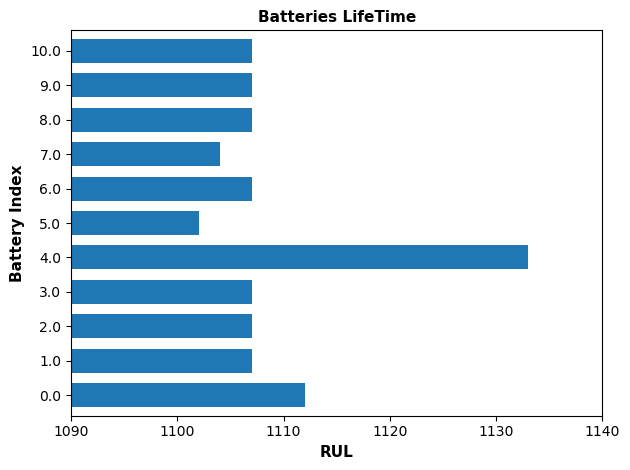

Battery Index
0.0     1112
1.0     1107
2.0     1107
3.0     1107
4.0     1133
5.0     1102
6.0     1107
7.0     1104
8.0     1107
9.0     1107
10.0    1107
Name: RUL, dtype: int64


In [5]:
max_rul =train_df.groupby('Battery Index')['RUL'].max()
ax=max_rul.plot(kind='barh',width=0.7, stacked=True,align='center')
plt.title('Batteries LifeTime',fontweight='bold',size=11)
plt.xlabel('RUL',fontweight='bold',size=11)
plt.xticks(size=10)
plt.ylabel('Battery Index',fontweight='bold',size=11)
plt.yticks(size=10)
plt.xlim(1090,1140)
plt.tight_layout()
plt.show()
print(max_rul)

#### How does each feature varies with RUL

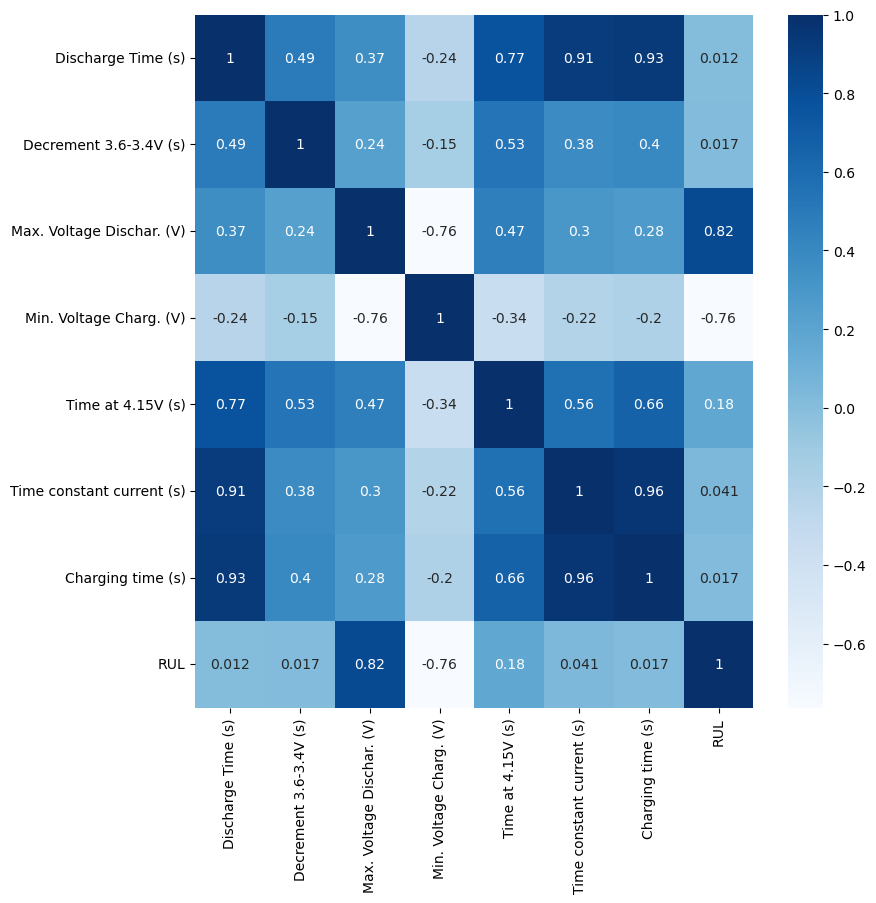

In [6]:
corr_matrix = train_df.drop(columns=['Battery Index']).corr()
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()


In [7]:
def plot_features(df):
    features = list(df.drop(columns=['RUL','Battery Index']).columns)
    
    plt.figure(figsize=(13,5))
    for i in features:
        for j in df['Battery Index'].unique():
            plt.plot('RUL', i, data = df[df['Battery Index']==j])
        plt.xlim(1133, 0) 
        plt.xticks(np.arange(0, 1133, 100))
        plt.ylabel(i)
        plt.xlabel('Remaining Useful Life')
        plt.show()

In [ ]:
# plot_features(train_df)

In [ ]:
# plot_features(test_df)

##### As shown from the correlation matrix and the plots, only Max Voltage Discharge, Min Voltage charge and Time at 4.15V had correlation with RUL.

#### Removing Outliers

In [ ]:
# features = list(train_df.drop(columns=['Battery Index', 'RUL']).columns)

# for i in features:
#     sns.boxplot(train_df[i])
#     plt.show()

In [59]:
def outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 =  df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower, upper = Q1 - IQR*1.5, Q3 + IQR*1.5

    df = df[(df[column]>lower) & (df[column]<upper)]

    return lower, upper

In [115]:
train_df_clean = train_df.copy()
val_df_clipped = val_df.copy()
test_df_clipped = test_df.copy()


for i in features:
    lower, upper = outlier_bounds(train_df,i)
    mean_val = train_df_clean[i].mean()
    
    train_df_clean = train_df[(train_df[i]>lower) & (train_df[i]<upper)]
    val_df_clipped.loc[val_df_clipped[i] < lower, i] = mean_val
    val_df_clipped.loc[val_df_clipped[i] > upper, i] = mean_val

    test_df_clipped.loc[test_df_clipped[i] < lower, i] = mean_val
    test_df_clipped.loc[test_df_clipped[i] > upper, i] = mean_val



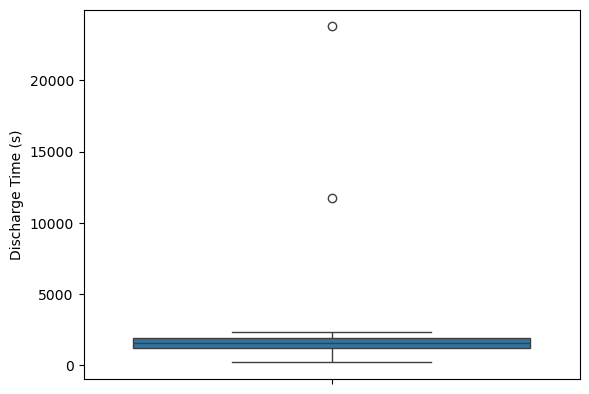

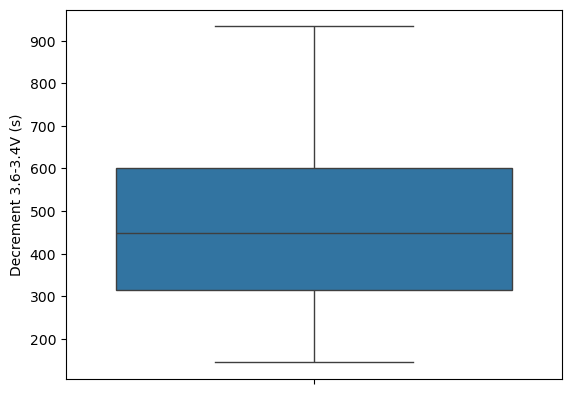

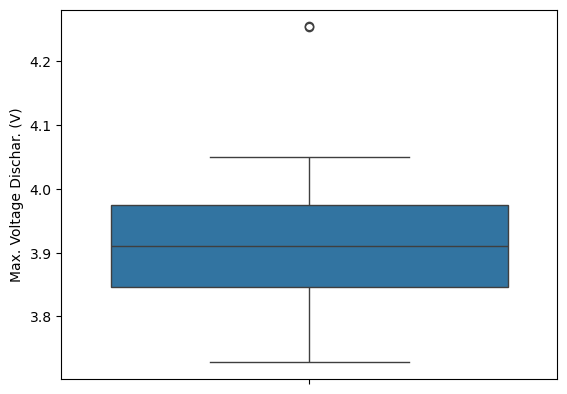

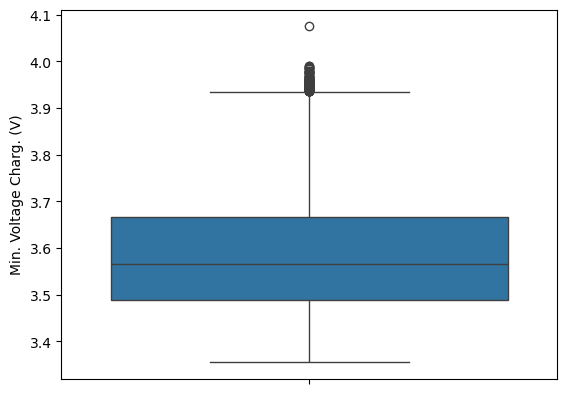

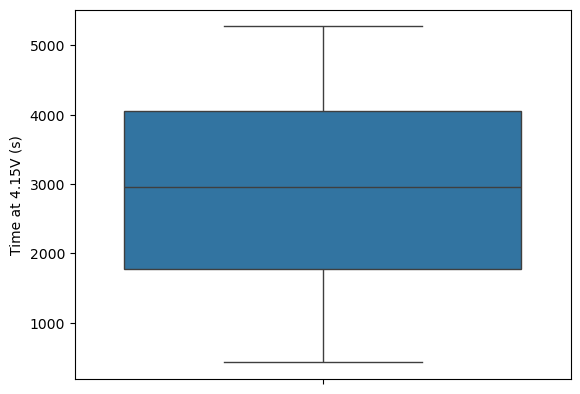

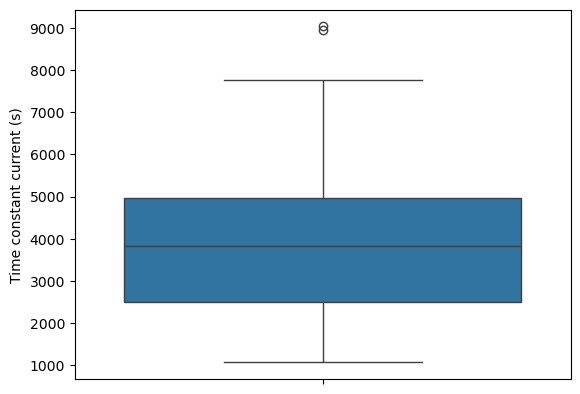

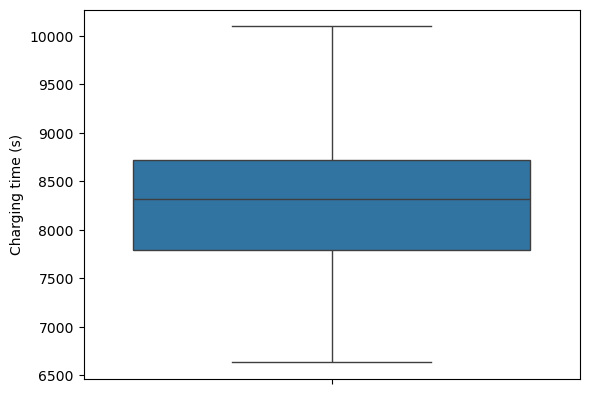

In [67]:
for i in features:
    sns.boxplot(train_df_clean[i])
    plt.show()

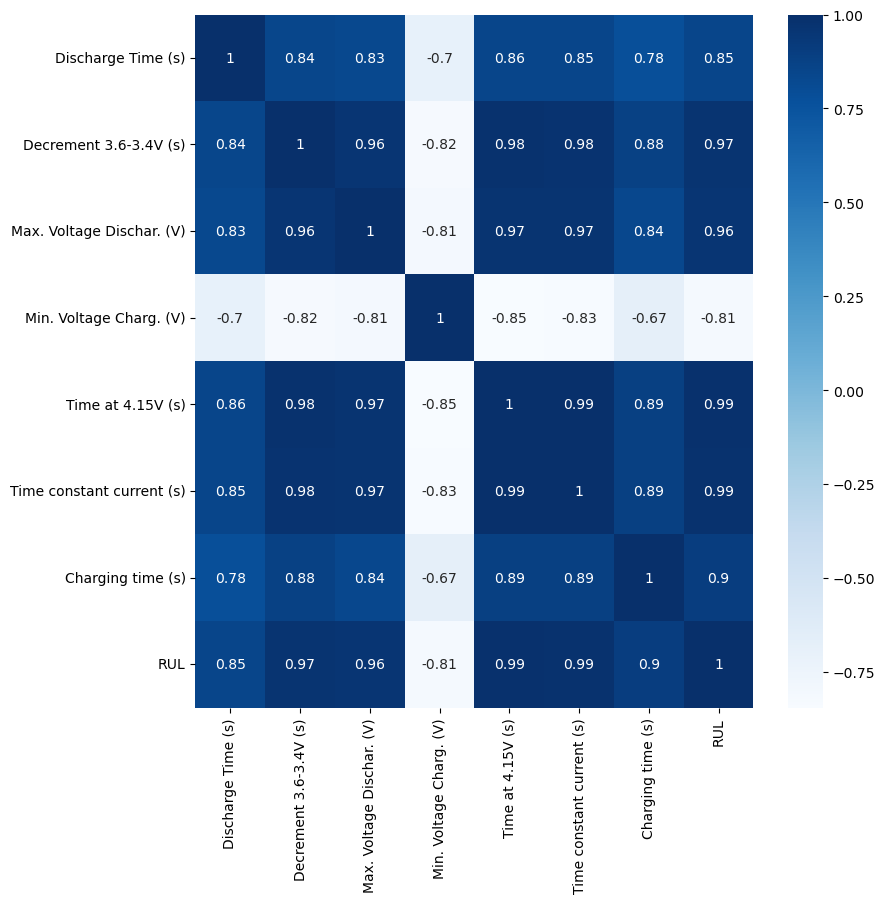

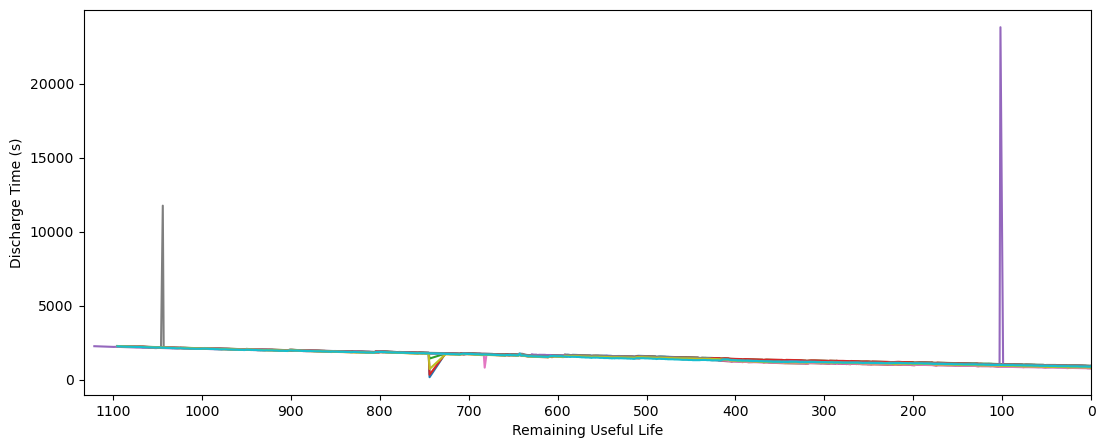

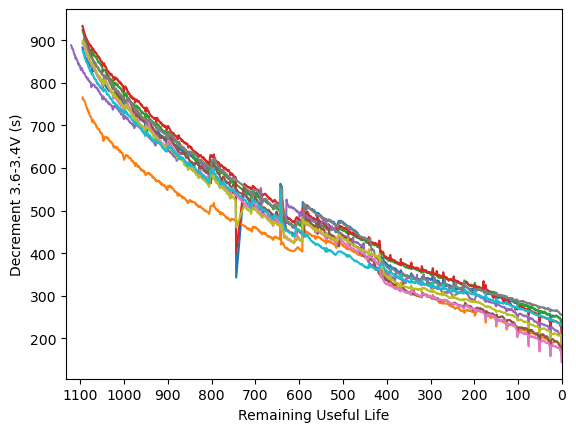

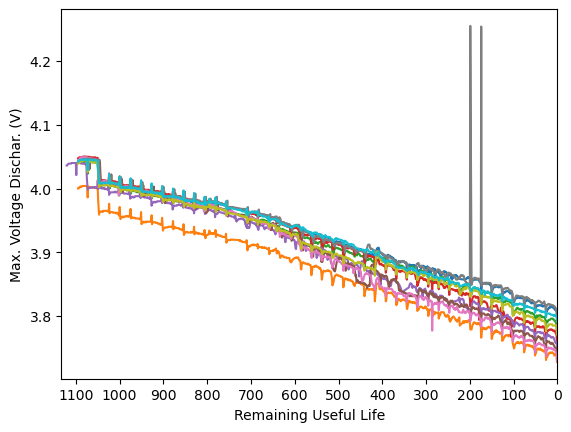

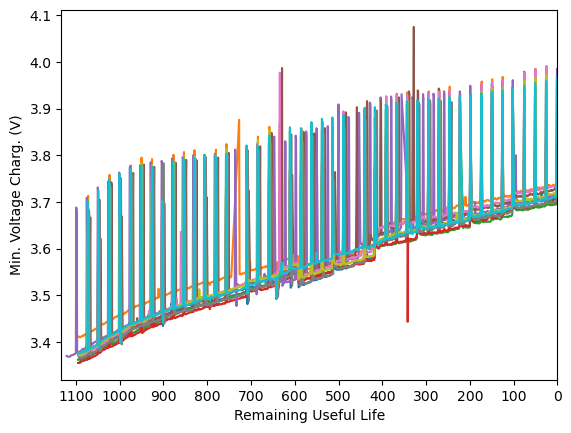

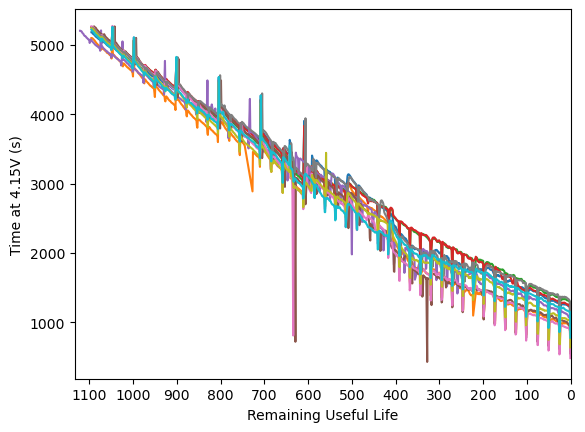

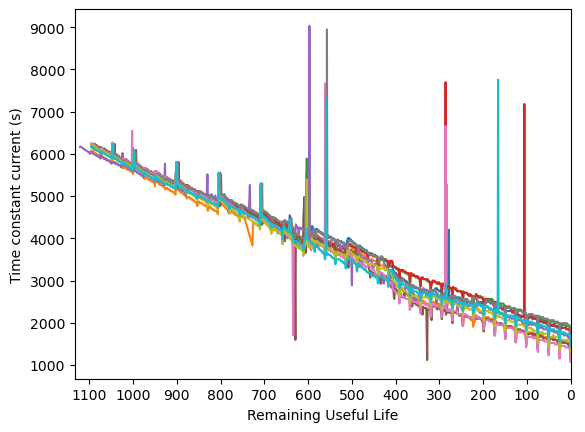

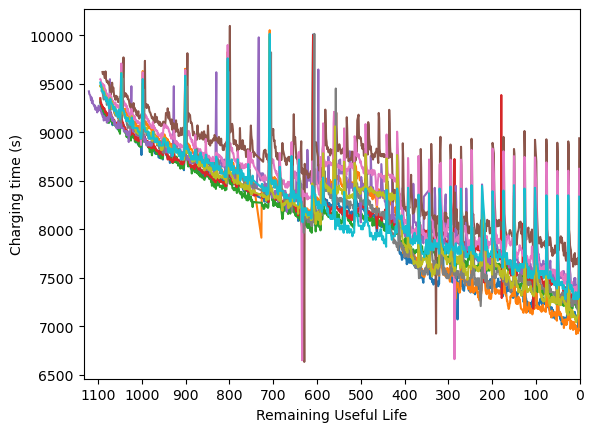

In [65]:
corr_matrix = train_df_clean.drop(columns=['Battery Index']).corr()
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()
plot_features(train_df_clean)

In [71]:
x_train = train_df.drop(columns=['Battery Index', 'RUL'])
y_train = train_df['RUL']

x_val = val_df.drop(columns=['Battery Index', 'RUL'])
y_val = val_df['RUL']

x_test = test_df.drop(columns=['Battery Index', 'RUL'])
y_test = test_df['RUL']


In [73]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [117]:
x_train_clean = train_df_clean.drop(columns=['Battery Index', 'RUL'])
y_train_clean = train_df_clean['RUL']

x_val_clipped = val_df_clipped.drop(columns=['Battery Index', 'RUL'])
y_val_clipped = val_df_clipped['RUL']


x_test_clipped = test_df_clipped.drop(columns=['Battery Index', 'RUL'])
y_test_clipped = test_df_clipped['RUL']


In [118]:
scaler_clean = StandardScaler()
scaler_clean.fit(x_train_clean)
x_train_clean_scaled = scaler_clean.transform(x_train_clean)
x_val_clean_scaled = scaler_clean.transform(x_val_clipped)
x_test_clean_scaled = scaler_clean.transform(x_test_clipped)

## Models with No Outlier Removal

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

reg = LinearRegression().fit(x_train_scaled, y_train)
y_train_pred = reg.predict(x_train_scaled)

print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', root_mean_squared_error(y_train, y_train_pred))
print('Train R2:', reg.score(x_train_scaled, y_train))



Train MAE: 75.71033929850034
Train RMSE: 121.03635479101558
Train R2: 0.859186239076073


In [75]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

y_pred = reg.predict(x_val_scaled)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)



MAE: 140.47924650024314
RMSE: 197.45976068937094
R2: 0.6235322006137005


In [76]:
result = defaultdict(list)
result['Model'].append('Linear Regression')
result['MAE'].append(mae)
result['RMSE'].append(rmse)
result['R2'].append(r2)

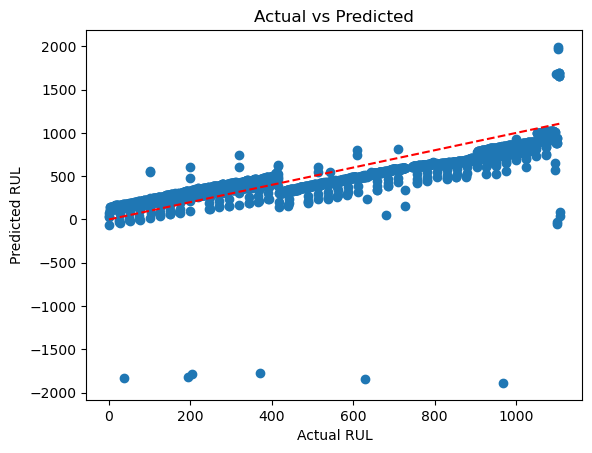

In [79]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

### Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, GroupKFold

rf_regressor = RandomForestRegressor(n_jobs= -1, random_state= 0)

param = {'n_estimators':[100,250,500],'max_depth':[None, 10,20], 'min_samples_split':[2, 5,10],'min_samples_leaf': [0.05, 0.1], 'max_features': ['sqrt'] }

group_kfold = GroupKFold(n_splits=5)
groups = train_df['Battery Index']

rf_reg = GridSearchCV(estimator=rf_regressor, param_grid= param, n_jobs=-1, cv = group_kfold , scoring = 'neg_root_mean_squared_error', verbose=1)
rf_reg.fit(x_train_scaled, y_train, groups=groups)
print('Best hyperparameters:', rf_reg.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 0.05, 'min_samples_split': 2, 'n_estimators': 250}


In [82]:
print('Best hyperparameters:', rf_reg.best_params_)
best_model = rf_reg.best_estimator_

y_train_pred = best_model.predict(x_train_scaled)

print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:",-rf_reg.best_score_)

print("Train R2:",best_model.score(x_train_scaled, y_train))



Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 0.05, 'min_samples_split': 2, 'n_estimators': 250}
Train MAE: 44.67065914086462
Train RMSE: 81.992047626368
Train R2: 0.9414310455205359


In [83]:
y_pred = rf_reg.predict(x_val_scaled)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 62.68671025053071
RMSE: 92.88242664287151
R2: 0.9167013948364751


In [84]:
result['Model'].append('Random Forest Regressor')
result['MAE'].append(mae)
result['RMSE'].append(rmse)
result['R2'].append(r2)

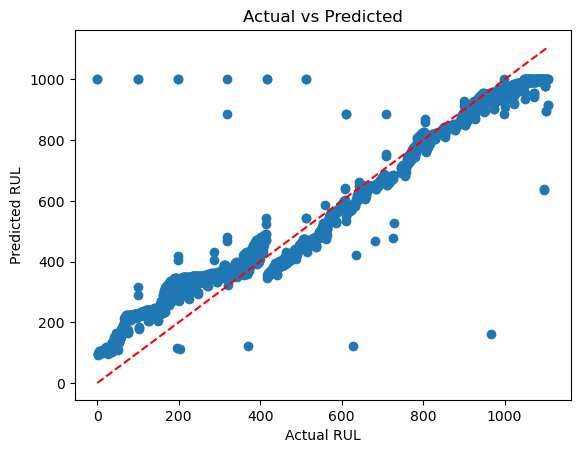

In [85]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

### SVR

In [86]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', tol = 1e-3)

param = {'epsilon':[1, 5, 10, 20],'C':[0.1, 1, 10, 100]}

group_kfold = GroupKFold(n_splits=5)
groups = train_df['Battery Index']

svr_grid = GridSearchCV(estimator=svr, param_grid= param, n_jobs=-1, cv = group_kfold , scoring = 'neg_root_mean_squared_error', verbose= 1)
svr_grid.fit(x_train_scaled, y_train, groups=groups)
print('Best hyperparameters:', svr_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'C': 100, 'epsilon': 1}


In [87]:
print('Best hyperparameters:', svr_grid.best_params_)


best_model = svr_grid.best_estimator_

y_train_pred = best_model.predict(x_train_scaled)

print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:",-svr_grid.best_score_)
print("Train R2:",best_model.score(x_train_scaled, y_train))

Best hyperparameters: {'C': 100, 'epsilon': 1}
Train MAE: 36.20536832555552
Train RMSE: 63.259625152543336
Train R2: 0.9698079319306363


In [88]:
y_pred = svr_grid.predict(x_val_scaled)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 71.86254325144401
RMSE: 86.35112921713502
R2: 0.9280042823370275


In [89]:
result['Model'].append('SVR')
result['MAE'].append(mae)
result['RMSE'].append(rmse)
result['R2'].append(r2)

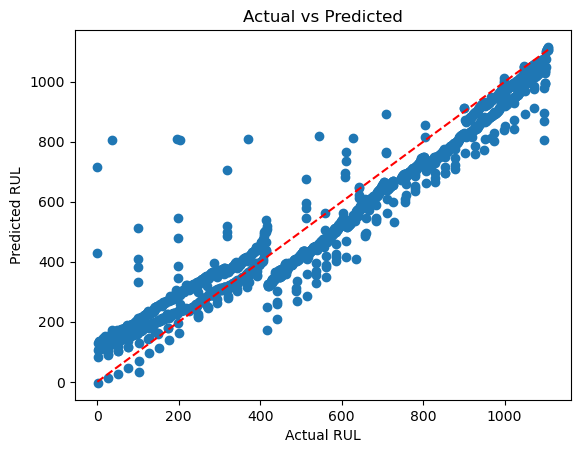

In [90]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

#### XGBoost

In [97]:
#https://www.datacamp.com/tutorial/xgboost-in-python
import xgboost as xgb
from xgboost import XGBRegressor
dtrain_reg = xgb.DMatrix(x_train_scaled, y_train, enable_categorical=False)
dval_reg = xgb.DMatrix(x_val_scaled, y_val, enable_categorical=False)

In [93]:
params = {"objective": "reg:squarederror", "device": "cuda", "max_depth": 6}

n = 5000
results  = xgb.cv(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   verbose_eval=500,
   early_stopping_rounds=100,
   nfold=5
)

[0]	train-rmse:227.77898+0.33400	test-rmse:228.11394+1.56626
[500]	train-rmse:3.80874+0.51024	test-rmse:21.60111+6.35584
[1000]	train-rmse:3.40982+0.56661	test-rmse:21.54827+6.38656
[1099]	train-rmse:3.39212+0.56958	test-rmse:21.54901+6.38582


In [94]:
best_rmse = results["test-rmse-mean"].min()
best_round = results["test-rmse-mean"].idxmin()

print(f"Best RMSE: {best_rmse:.4f} at round {best_round}")


Best RMSE: 21.5483 at round 1000


In [146]:
n = best_round
params = {
    "objective": "reg:squarederror",
    "device": "cuda",
    "max_depth": 6,
    "eta": 0.05,
    "lambda": 1,   # L2
    "alpha": 0.5     # L1
}
xgb_model  = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   verbose_eval=500,)
 


In [147]:

y_pred = xgb_model.predict(dval_reg)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 57.96025891600656
RMSE: 79.46604849769963
R2: 0.9390275201758619


In [136]:
result['Model'].append('XGBoost')
result['MAE'].append(mae)
result['RMSE'].append(rmse)
result['R2'].append(r2)

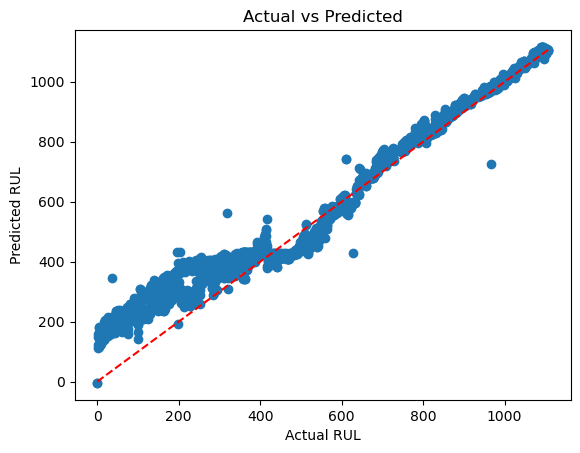

In [148]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

In [102]:
results_df = pd.DataFrame(result)
results_df.set_index('Model', inplace=True)
results_df

,MAE,RMSE,R2
Model,,,
Linear Regression,140.479247,197.459761,0.623532
Random Forest Regressor,62.686710,92.882427,0.916701
SVR,71.862543,86.351129,0.928004
XGBoost,59.344716,79.075615,0.939625


## Models with  Outlier Removal

### Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

reg = LinearRegression().fit(x_train_clean_scaled, y_train_clean)
y_train_pred = reg.predict(x_train_clean_scaled)

print('Train MAE:', mean_absolute_error(y_train_clean, y_train_pred))
print('Train RMSE:', root_mean_squared_error(y_train_clean, y_train_pred))
print('Train R2:', reg.score(x_train_clean_scaled, y_train_clean))


Train MAE: 31.034898376403483
Train RMSE: 41.859575434867146
Train R2: 0.9828321484658136


In [124]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

y_pred = reg.predict(x_val_clean_scaled)
r2 = r2_score(y_val_clipped, y_pred)
mae = mean_absolute_error(y_val_clipped, y_pred)
rmse = root_mean_squared_error(y_val_clipped, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 48.5028779403248
RMSE: 85.5644294421232
R2: 0.9293101369620531


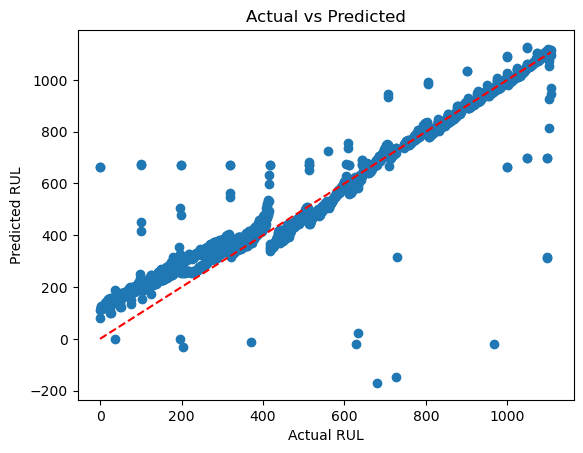

In [125]:
plt.scatter(y_val_clipped, y_pred)
plt.plot([y_val_clipped.min(), y_val_clipped.max()], [y_val_clipped.min(), y_val_clipped.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

### RF regressor


In [ ]:
rf_regressor = RandomForestRegressor(n_jobs= -1, random_state= 0)

param = {'n_estimators':[100,250,500],'max_depth':[None, 10,20], 'min_samples_split':[2, 5,10],'min_samples_leaf': [0.05, 0.1], 'max_features': ['sqrt'] }

group_kfold = GroupKFold(n_splits=5)
groups = train_df['Battery Index']

rf_reg = GridSearchCV(estimator=rf_regressor, param_grid= param, n_jobs=-1, cv = group_kfold , scoring = 'neg_root_mean_squared_error', verbose=1)
rf_reg.fit(x_train_clean_scaled, y_train_clean, groups=groups)
print('Best hyperparameters:', rf_reg.best_params_)


In [127]:
best_model = rf_reg.best_estimator_
y_train_pred = best_model.predict(x_train_clean_scaled)

print('Train MAE:', mean_absolute_error(y_train_clean, y_train_pred))
print("Train RMSE:",-rf_reg.best_score_)

print("Train R2:",best_model.score(x_train_scaled, y_train))

Train MAE: 149.9793779722768
Train RMSE: 81.992047626368
Train R2: 0.9414310455205359


In [128]:
y_pred = rf_reg.predict(x_val_scaled)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
print('MAE:', mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 62.68671025053071
RMSE: 92.8824266428715
R2: 0.9167013948364751


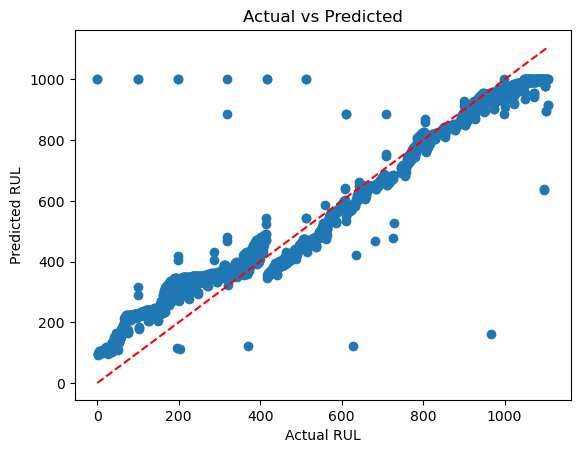

In [129]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted")
plt.show()

#### Feature Importance

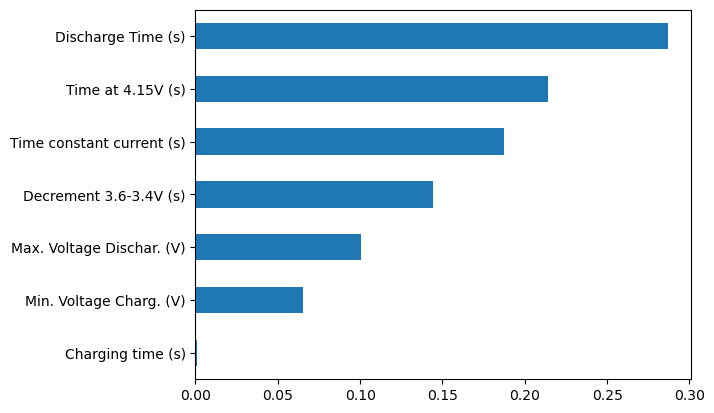

In [41]:

feature_importance = pd.Series(rf_reg.best_estimator_.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh')
plt.show()